## install & import packages

#### Press Kernel above -> restart & run all

In [1]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cbpro

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install dataclasses

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [14]:
import json
import pandas_ta as ta
import cbpro
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## public coinbase query

In [15]:
public_client = cbpro.PublicClient() #opens a client to query PUBLIC coinbase api

In [16]:
df = pd.read_json(json.dumps(public_client.get_product_historic_rates('BTC-USD', granularity=900))) #Granularity choices: 60 (minute), 300 (5 minutes), 900 (15 mintes), 3600 (1 hour), 21600 (6 hours), 86400 (1 day)

In [17]:
df.columns = ['time', 'low', 'high', 'open', 'close', 'volume'] #label columns
df_time = df["time"]
df_low = df["low"]
df_high = df["high"]
df_open = df["open"]
df_close = df["close"]
df_volume = df["volume"]

In [18]:
rsi = ta.rsi(df_close, 14)
sma50 = ta.sma(df_close, 50)

#### run below to plot the above historic data

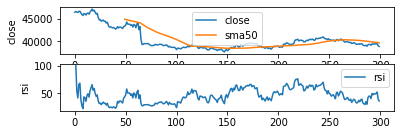

In [19]:
ax1 = plt.subplot(411)
plt.plot(df_close, label="close")
plt.plot(sma50, label="sma50")
plt.legend()
plt.xlabel('time')
plt.ylabel('close')

plt.subplot(412, sharex=ax1)
plt.plot(rsi, label="rsi")
plt.legend()
plt.ylabel('rsi')

plt.show()

## Websocket stream

In [20]:
api_key = 'b530f8d3d0c88c44c63300fdfcdede40'
api_secret = 'WS9U7h4ZCLS/3nAiMqtbWWzlYWmcE57AlvZ9bsoW60eCuIiGTcEt1FVQfnD91vWPVUj6icvRjRGAlUtqe187HQ=='
api_passphrase = 'pickysandbox'

In [21]:
price_val = 1
time_val = 1

class TextWebsocketClient(cbpro.WebsocketClient):
    def on_open(self):
        self.url = 'wss://ws-feed-public.sandbox.pro.coinbase.com'
        self.message_count = 0
        self.test_var = '1231'
        
    def on_message(self,msg):
        self.test_var = '5346'
        self.message_count += 1
        msg_type = msg.get('type',None)
        if msg_type == 'ticker':
            global time_val
            time_val = msg.get('time',('-'*27))
            global price_val
            price_val = msg.get('price',None)
            price_val = float(price_val) if price_val is not None else 'None'
            product_id = msg.get('product_id',None)

            # print(f"{time_val:30} {price_val:.3f} {product_id}\tchannel type:{msg_type}")
            
        
    def on_close(self):
        print(f"<---Websocket connection closed--->\n\tTotal messages: {self.message_count}") 

In [22]:
testget = TextWebsocketClient.test_var
testget()

AttributeError: type object 'TextWebsocketClient' has no attribute 'test_var'

In [23]:
on_message()
print(on_message.test_Var)

NameError: name 'on_message' is not defined

#### run below to start stream

In [25]:
stream = TextWebsocketClient(products=['BTC-USD'],channels=['ticker'])
stream.start()

#### run below to close stream

In [ ]:
stream.close()
plot = 0

#### animated plot

In [28]:
print('price: ', price_val,'time: ', time_val)

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

def animate(i):
    x_vals.append(next(time_val))
    y_vals.append(next(price_val))
    
    plt.plot(x_vals, y_vals)
    
ani = FuncAnimation(plt.gcf(), animate, interval=1000)

plt.show()

price:  46638.36 time:  2021-02-09T04:56:17.556391Z


<Figure size 432x288 with 0 Axes>

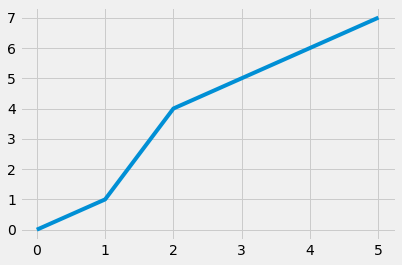

In [29]:
plt.style.use('fivethirtyeight')

x_vals = [0, 1, 2, 5]
y_vals = [0, 1, 4, 7]

plt.plot(x_vals, y_vals)